In [39]:
# Problem 1
import numpy as np
# a) Make an array a of size 6x4 where every element is a 2
a = np.full((6,4), 2)
print(a)

# b) Make an array b of size 6x4 that has 3 on the leading diagonal and 1 everywhere else
b = np.ones((6,4))
np.fill_diagonal(b, 3,)
print(b)

# c) Can you multiply these two matrices together? Wy does a * b work, but not np.dot(a,b)
print(a*b)
'''
    The operation a*b seems to multiply the elements of the matrices together. This means
    that the element a(1,1) is multiplied by b(1,1) to optain element (1,1) in resulting matrix c, if c = a*b.
    This means that you can only perform this "*" operation on matrices of the exact same dimension. 

    The dot product between a and b do not work because the convolutions between the
    sizes of the matrices go out of bounds
'''

# d) Compute np.dot(a.transpose(), b) and np.dot(a,b.transpose()). Why are the results different shapes?
print(np.dot(a.transpose(), b)) # 4x4 array filled with 16
print(np.dot(a, b.transpose())) # 6x6 array with 12 in first 4 columsn and 8 in last 2

'''
    The results are different shapes because a.transpose() dot b is a 4x6 dot 6x4 operation,
    which results in a 4x4 resulting matrix.

    The latter dot product is a 6x4 dot 4x6 matrix dot operation, which results in a 
    6x6 resulting matrix.
'''

print()

[[2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [2 2 2 2]]
[[3. 1. 1. 1.]
 [1. 3. 1. 1.]
 [1. 1. 3. 1.]
 [1. 1. 1. 3.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[6. 2. 2. 2.]
 [2. 6. 2. 2.]
 [2. 2. 6. 2.]
 [2. 2. 2. 6.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]]
[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]
[[12. 12. 12. 12.  8.  8.]
 [12. 12. 12. 12.  8.  8.]
 [12. 12. 12. 12.  8.  8.]
 [12. 12. 12. 12.  8.  8.]
 [12. 12. 12. 12.  8.  8.]
 [12. 12. 12. 12.  8.  8.]]



In [32]:
# Problem 2

''' Write a function that consists of a set of loops that run through a 2-D
    numPy array and counts the number of ones in it. Do the same thing using
    the np.where() function. Name your functions countOnesLoop() and 
    countOnesWhere(). 
''' 

def countOnesLoop(arr):
    count = 0
    if isinstance(arr, np.ndarray) and arr.ndim == 2:
        for row in arr:
            for element in row:
                if element == 1:
                    count += 1
    else:
        print("Not a 2-D array")
    return count

ones = np.full((6,4),1)
print(countOnesLoop(ones))

def countOnesWhere(arr):
    if isinstance(arr, np.ndarray) and arr.ndim == 2:
        indices = np.where(arr == 1)
        return len(indices[0])
    else:
        print("Not a 2-D array")

print(countOnesWhere(ones))

24
24


In [ ]:
# Problem 3

"""
    A decision rule specifies the value of the output y^ given values of the inputs
    x1 and x2.

    Given probabilities in a table, we are to compute the MAP decision rule by
    specifying the ouptut y^ (either 0 or 1) for each possible input combination.

    Map Decision Rule selects the class C_k the maximizes the posterior probability
"""

## Naive Bayes Calculation

### Part A: Naive Bayes Probabilities

Given:

\[
P(Y | X_{1}, X_{2}) = P(X_{1}, X_{2} | Y) * P(Y)
\]

We can calculate the conditional probabilities for different values of \( X_1 \) and \( X_2 \) as follows:

#### 1. When \( X_1 = 1, X_2 = 1 \):
\[
P(1 | X_1 = 1, X_2 = 1) = (0.5)(0.2) = 0.10
\]
\[
P(0 | X_1 = 1, X_2 = 1) = (0.1)(0.8) = 0.08
\]
**Classification**: \( Y^ = 1 \) (since \( 0.10 > 0.08 \))

#### 2. When \( X_1 = 1, X_2 = 0 \):
\[
P(1 | X_1 = 1, X_2 = 0) = (0.2)(0.2) = 0.04
\]
\[
P(0 | X_1 = 1, X_2 = 0) = (0.1)(0.8) = 0.08
\]
**Classification**: \( Y^ = 0 \) (since \( 0.08 > 0.04 \))

#### 3. When \( X_1 = 0, X_2 = 1 \):
\[
P(1 | X_1 = 0, X_2 = 1) = (0.2)(0.2) = 0.04
\]
\[
P(0 | X_1 = 0, X_2 = 1) = (0.2)(0.8) = 0.16
\]
**Classification**: \( Y^ = 0 \) (since \( 0.16 > 0.04 \))

#### 4. When \( X_1 = 0, X_2 = 0 \):
\[
P(1 | X_1 = 0, X_2 = 0) = (0.1)(0.2) = 0.02
\]
\[
P(0 | X_1 = 0, X_2 = 0) = (0.5)(0.8) = 0.40
\]
**Classification**: \( Y^ = 0 \) (since \( 0.40 > 0.02 \))

---

### Part B: Decision Rule Under the Naive Bayes Assumption

We apply the Naive Bayes decision rule, which states:

\[
\text{Classify } Y = 1 \text{ if } P(X_1, X_2 | Y=1) \cdot P(Y=1) > P(X_1, X_2 | Y=0) \cdot P(Y=0)
\]

Otherwise, classify \( Y = 0 \).

Using the given prior probabilities \( P(Y=1) = 0.2 \) and \( P(Y=0) = 0.8 \), we calculate the total misclassification probability.

### Misclassification Probability Calculation:

- **When \( X_1 = 1, X_2 = 1 \)**:
  \[
  P(\text{misclassification}) = P(Y=0 | X_1=1, X_2=1) \times P(Y=0) = 0.08 \times 0.8 = 0.064
  \]

- **When \( X_1 = 1, X_2 = 0 \)**:
  \[
  P(\text{misclassification}) = P(Y=1 | X_1=1, X_2=0) \times P(Y=1) = 0.04 \times 0.2 = 0.008
  \]

- **When \( X_1 = 0, X_2 = 1 \)**:
  \[
  P(\text{misclassification}) = P(Y=1 | X_1=0, X_2=1) \times P(Y=1) = 0.04 \times 0.2 = 0.008
  \]

- **When \( X_1 = 0, X_2 = 0 \)**:
  \[
  P(\text{misclassification}) = P(Y=1 | X_1=0, X_2=0) \times P(Y=1) = 0.02 \times 0.2 = 0.004
  \]

### Total Misclassification Probability:
\[
P(\text{total misclassification}) = 0.064 + 0.008 + 0.008 + 0.004 = 0.084
\]

Thus, the total misclassification probability is \( \boxed{0.084} \), or 8.4%.


In [45]:
# Problem 4 a
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer

In [46]:
data = pd.read_csv("/Users/efang/Desktop/coding/Intro-to-ML/CSDS340/data/wine.data.csv", header=None)

attribute_df = data.iloc[:, 1:]

normalized_data = (attribute_df - attribute_df.mean())/attribute_df.std()

normalized_data = pd.concat([data.iloc[:, [0]], normalized_data], axis=1)


In [47]:
print(normalized_data)

     0         1         2         3         4         5         6         7   \
0     1  1.514341 -0.560668  0.231400 -1.166303  1.908522  0.806722  1.031908   
1     1  0.245597 -0.498009 -0.825667 -2.483841  0.018094  0.567048  0.731565   
2     1  0.196325  0.021172  1.106214 -0.267982  0.088110  0.806722  1.212114   
3     1  1.686791 -0.345835  0.486554 -0.806975  0.928300  2.484437  1.462399   
4     1  0.294868  0.227053  1.835226  0.450674  1.278379  0.806722  0.661485   
..   ..       ...       ...       ...       ...       ...       ...       ...   
173   3  0.873810  2.966176  0.304301  0.300954 -0.331985 -0.982841 -1.420891   
174   3  0.491955  1.408636  0.413653  1.049555  0.158126 -0.791103 -1.280731   
175   3  0.331822  1.739837 -0.388260  0.151234  1.418411 -1.126646 -1.340800   
176   3  0.208643  0.227053  0.012696  0.151234  1.418411 -1.030776 -1.350811   
177   3  1.391162  1.578712  1.361368  1.498716 -0.261969 -0.391646 -1.270720   

           8         9     

In [48]:
x_train, x_test, y_train, y_test = train_test_split(normalized_data.iloc[:, 1:], normalized_data.iloc[:, 0], test_size=0.5, random_state=1)

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

gnb_accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {gnb_accuracy}")

Test set accuracy: 0.9775280898876404


In [34]:
# Problem 4 b

binarizer = Binarizer(threshold = -0.69)
binarized_data = binarizer.fit_transform(normalized_data.iloc[:, 1:])

x_train, x_test, y_train, y_test = train_test_split(binarized_data, normalized_data.iloc[:, 0], test_size=0.5, random_state=1)

bnl = BernoulliNB()

bnl.fit(x_train, y_train)

y_pred = bnl.predict(x_test)

bnl_accuracy = accuracy_score(y_test, y_pred)

print(bnl_accuracy)



0.9550561797752809


In [36]:
# Function to find most optimal threshold
best_accuracy = 0
best_threshold = None

for threshold in np.arange(-0.0, -1.6, -0.001):
    # Binarize with threshold increment
    binarizer = Binarizer(threshold=threshold)
    binarized_data = binarizer.fit_transform(normalized_data.iloc[:, 1:])
    
    x_train, x_test, y_train, y_test = train_test_split(binarized_data, normalized_data.iloc[:, 0], test_size=0.5, random_state=1)
    
    bnl = BernoulliNB()
    bnl.fit(x_train, y_train)
    
    y_pred = bnl.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

print(f"Best threshold: {best_threshold}")
print(f"Best accuracy: {best_accuracy}")


Best threshold: -0.47300000000000003
Best accuracy: 0.9775280898876404


In [54]:
# Problem 5

import pandas as pd

df = pd.read_csv("/Users/efang/Desktop/coding/Intro-to-ML/CSDS340/data/pima-indians-diabetes.csv", header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1]. values

In [7]:
import numpy as np

class Perceptron:
    """
        Perception classifier.

        Parameters
        ------------
        eta : float # Learning rate (between 0.0 and 1.0)
        n_iter : int # Passes over the training set
        random_state : int # Random number generator seed for random weight initialization

        Attributes
        -------------
        w_ : 1d-array # Weights after fitting
        b_ : Scalar # Bias unit after fitting
        errors_ : list # Number of misclassifications (updates) in each epoch
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
            Fit training data.

            Parameters 
            -----------
            X : {array-like}
,           shape = [n_examples, n_features] # Training vectors, where n_examples is the number of examples and n_features is the number of features
            y : array-like, shape = [n_examples] # Target values

            Returns
            --------
            self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        # Calculate net input
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        # Return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    



In [38]:
from sklearn.metrics import accuracy_score
best_accuracy = 0
best_eta = None
for eta in np.arange(0, 1, 0.001):
    ppn = Perceptron(eta=eta, n_iter=100)

    ppn.fit(X,y)

    y_pred = ppn.predict(X)

    accuracy = accuracy_score(y, y_pred)

    #print(f"Accuracy: {accuracy * 100:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_eta = eta



In [26]:
print(best_accuracy)
print(best_eta)

0.6940104166666666
0.003


Accuracy: 62.24%


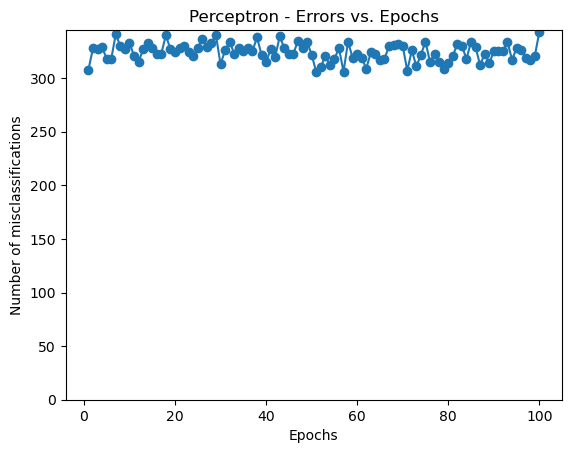

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Perceptron:
    """
        Perception classifier.

        Parameters
        ------------
        eta : float # Learning rate (between 0.0 and 1.0)
        n_iter : int # Passes over the training set
        random_state : int # Random number generator seed for random weight initialization

        Attributes
        -------------
        w_ : 1d-array # Weights after fitting
        b_ : Scalar # Bias unit after fitting
        errors_ : list # Number of misclassifications (updates) in each epoch
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """
            Fit training data.

            Parameters 
            -----------
            X : {array-like}, shape = [n_examples, n_features] 
                Training vectors, where n_examples is the number of examples 
                and n_features is the number of features
            y : array-like, shape = [n_examples] 
                Target values

            Returns
            --------
            self : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            # Append errors for the epoch after processing all examples
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        # Calculate net input
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        # Return class label after unit step
        return np.where(self.net_input(X) >= 0.0, 1, 0)

# Initialize the perceptron
ppn = Perceptron(eta=0.003, n_iter=100)

# Fit the model
ppn.fit(X, y)

# Predict the outcomes
y_pred = ppn.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotting the number of misclassification errors against the number of epochs
plt.plot(range(1, ppn.n_iter + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Perceptron - Errors vs. Epochs')
plt.ylim(bottom = 0)
plt.show()


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
